In [3]:
try:
  %tensorflow_version 2.x
  %load_ext tensorboard
except:
  pass

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, LeakyReLU, Activation
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.densenet import DenseNet121
from PIL import Image
import numpy as np
from tensorflow.keras.applications import ResNet152
import random
import matplotlib.pyplot as plt

In [6]:
def build_dataset():
    org_dataset = []
    label_list = []
    for i in range(1, 401):
        img = Image.open('/content/drive/MyDrive/indoor/1 ('+str(i)+").jpg")
        img = img.resize([128,128])
        img = np.array(img)
        org_dataset.append(img)
        label_list.append(1)
    return org_dataset,label_list

indoor,indoor_labels = build_dataset()

In [7]:
def build_dataset():
    org_dataset = []
    label_list = []
    for i in range(1, 401):
        img = Image.open('/content/drive/MyDrive/outdoor/1 ('+str(i)+").jpg")
        img = img.resize([128,128])
        img = np.array(img)
        org_dataset.append(img)
        label_list.append(0)
    return org_dataset,label_list

outdoor,outdoor_labels = build_dataset()

In [9]:
imgs = []
labels = []
for i in range(800):
    r = random.randint(0, 800)
    if r%2 == 0 :
        j = int(r/2)-1
        imgs.append(indoor[j])
        labels.append(indoor_labels[j])
    else:
        k = int(r/2)-1
        imgs.append(outdoor[k])
        labels.append(outdoor_labels[k])
        
X_train = imgs[0:720]
y_train = labels[0:720]
X_test = imgs[720:]
y_test = labels[720:]

In [57]:
model = ResNet152(weights='imagenet',include_top=False,input_shape=(128, 128, 3))


model.trainable = False

final_model = keras.Sequential([
    model,
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])


    
final_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])



history = final_model.fit(np.array(X_train),np.array(y_train),validation_split = 0.22,batch_size=4,epochs= 10)

Epoch 1/10
141/141 [==============================] - 23s 103ms/step - loss: 6.5918 - accuracy: 0.8877 - val_loss: 100.0202 - val_accuracy: 0.6226
Epoch 2/10
141/141 [==============================] - 12s 85ms/step - loss: 5.0978 - accuracy: 0.9501 - val_loss: 7.4921 - val_accuracy: 0.9308
Epoch 3/10
141/141 [==============================] - 12s 85ms/step - loss: 0.0821 - accuracy: 0.9947 - val_loss: 7.1126 - val_accuracy: 0.9623
Epoch 4/10
141/141 [==============================] - 12s 84ms/step - loss: 5.2032e-04 - accuracy: 1.0000 - val_loss: 7.1593 - val_accuracy: 0.9560
Epoch 5/10
141/141 [==============================] - 12s 85ms/step - loss: 3.9415e-14 - accuracy: 1.0000 - val_loss: 7.1593 - val_accuracy: 0.9560
Epoch 6/10
141/141 [==============================] - 12s 85ms/step - loss: 0.2440 - accuracy: 0.9964 - val_loss: 6.7199 - val_accuracy: 0.9623
Epoch 7/10
141/141 [==============================] - 12s 84ms/step - loss: 9.2212e-14 - accuracy: 1.0000 - val_loss: 6.7199 

In [58]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

pred = final_model.predict(np.array(X_test))

pred_list = []
for i in range(len(pred)):
    if pred[i]>= 0.5 :
        pred_list.append(1)
    else:
        pred_list.append(0)
    
accuracy(pred_list,np.array(y_test))

0.975

In [52]:
tf.math.confusion_matrix(
    np.array(y_test), pred_list, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[33,  0],
       [ 2, 45]], dtype=int32)>

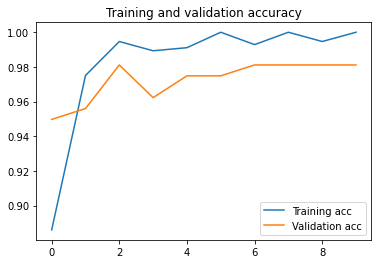

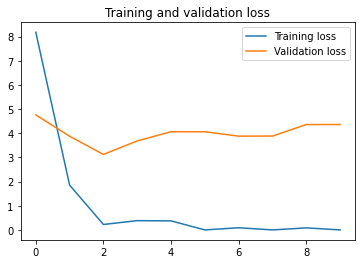

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
for layer in final_model.layers[-35:-1]:
  layer.trainable = True

    

final_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=['accuracy'])



history = final_model.fit(np.array(X_train),np.array(y_train),validation_split = 0.22,batch_size=4,epochs= 15)

Epoch 1/15
141/141 [==============================] - 52s 262ms/step - loss: 2.1254 - accuracy: 0.9251 - val_loss: 56.2792 - val_accuracy: 0.5912
Epoch 2/15
141/141 [==============================] - 34s 243ms/step - loss: 2.0619 - accuracy: 0.9037 - val_loss: 12.0917 - val_accuracy: 0.8113
Epoch 3/15
141/141 [==============================] - 34s 242ms/step - loss: 1.5405 - accuracy: 0.9305 - val_loss: 6.2823 - val_accuracy: 0.9057
Epoch 4/15
141/141 [==============================] - 34s 242ms/step - loss: 0.8959 - accuracy: 0.9519 - val_loss: 4.4492 - val_accuracy: 0.9371
Epoch 5/15
141/141 [==============================] - 34s 242ms/step - loss: 0.6835 - accuracy: 0.9733 - val_loss: 3.9413 - val_accuracy: 0.9308
Epoch 6/15
141/141 [==============================] - 34s 243ms/step - loss: 0.2159 - accuracy: 0.9786 - val_loss: 4.5657 - val_accuracy: 0.9119
Epoch 7/15
141/141 [==============================] - 34s 243ms/step - loss: 0.7258 - accuracy: 0.9519 - val_loss: 3.7191 - val_

In [60]:
pred = final_model.predict(np.array(X_test))

pred_list = []
for i in range(len(pred)):
    if pred[i]>= 0.5 :
        pred_list.append(1)
    else:
        pred_list.append(0)
    
accuracy(pred_list,np.array(y_test))

0.9

In [48]:
tf.math.confusion_matrix(
    np.array(y_test), pred_list, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[31,  2],
       [11, 36]], dtype=int32)>

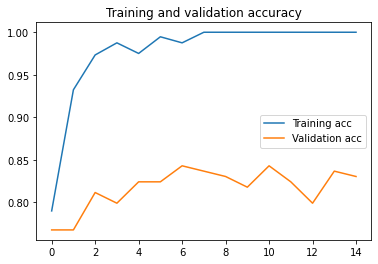

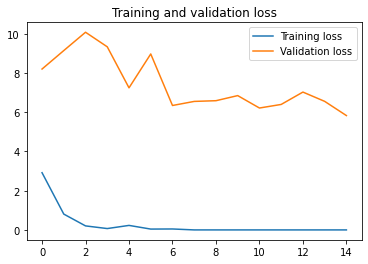

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [74]:
model = DenseNet121(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

model.trainable = False
final_model = keras.Sequential([
    model,
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

final_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

history = final_model.fit(np.array(X_train),np.array(y_train),validation_split = 0.22,batch_size=4,epochs= 15)

Epoch 1/15
141/141 [==============================] - 17s 77ms/step - loss: 17.5155 - accuracy: 0.7665 - val_loss: 29.6971 - val_accuracy: 0.6918
Epoch 2/15
141/141 [==============================] - 7s 49ms/step - loss: 7.2194 - accuracy: 0.8966 - val_loss: 3.2429 - val_accuracy: 0.9308
Epoch 3/15
141/141 [==============================] - 7s 49ms/step - loss: 4.0146 - accuracy: 0.9234 - val_loss: 2.8181 - val_accuracy: 0.9308
Epoch 4/15
141/141 [==============================] - 7s 49ms/step - loss: 2.5130 - accuracy: 0.9394 - val_loss: 5.1366 - val_accuracy: 0.8868
Epoch 5/15
141/141 [==============================] - 7s 49ms/step - loss: 1.9845 - accuracy: 0.9643 - val_loss: 2.1071 - val_accuracy: 0.9497
Epoch 6/15
141/141 [==============================] - 7s 49ms/step - loss: 1.2942 - accuracy: 0.9608 - val_loss: 3.0833 - val_accuracy: 0.9308
Epoch 7/15
141/141 [==============================] - 8s 57ms/step - loss: 1.3009 - accuracy: 0.9679 - val_loss: 4.1663 - val_accuracy: 0.9

In [75]:
pred = final_model.predict(np.array(X_test))

pred_list = []
for i in range(len(pred)):
    if pred[i]>= 0.5 :
        pred_list.append(1)
    else:
        pred_list.append(0)
    
accuracy(pred_list,np.array(y_test))

0.975

In [76]:
tf.math.confusion_matrix(
    np.array(y_test), pred_list, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[33,  0],
       [ 2, 45]], dtype=int32)>

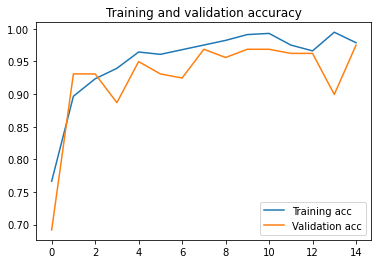

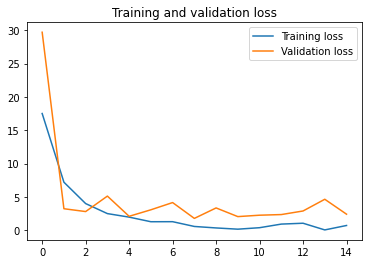

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [78]:
for layer in final_model.layers[-15:-1]:
  layer.trainable = True

    
final_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=['accuracy'])



history = final_model.fit(np.array(X_train),np.array(y_train),validation_split = 0.22,batch_size=4,epochs= 15)

Epoch 1/15
141/141 [==============================] - 29s 133ms/step - loss: 2.5611 - accuracy: 0.7540 - val_loss: 1.6311 - val_accuracy: 0.8868
Epoch 2/15
141/141 [==============================] - 14s 100ms/step - loss: 1.0567 - accuracy: 0.8699 - val_loss: 1.4531 - val_accuracy: 0.8616
Epoch 3/15
141/141 [==============================] - 14s 100ms/step - loss: 0.7443 - accuracy: 0.9109 - val_loss: 1.5640 - val_accuracy: 0.8994
Epoch 4/15
141/141 [==============================] - 15s 108ms/step - loss: 0.5851 - accuracy: 0.9251 - val_loss: 1.3452 - val_accuracy: 0.8742
Epoch 5/15
141/141 [==============================] - 14s 99ms/step - loss: 0.6354 - accuracy: 0.9037 - val_loss: 1.1117 - val_accuracy: 0.9182
Epoch 6/15
141/141 [==============================] - 15s 108ms/step - loss: 0.2902 - accuracy: 0.9537 - val_loss: 0.8690 - val_accuracy: 0.8994
Epoch 7/15
141/141 [==============================] - 14s 101ms/step - loss: 0.3128 - accuracy: 0.9394 - val_loss: 0.7713 - val_acc

In [79]:
pred = final_model.predict(np.array(X_test))

pred_list = []
for i in range(len(pred)):
    if pred[i]>= 0.5 :
        pred_list.append(1)
    else:
        pred_list.append(0)
    
accuracy(pred_list,np.array(y_test))

0.9

In [80]:
tf.math.confusion_matrix(
    np.array(y_test), pred_list, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[32,  1],
       [ 7, 40]], dtype=int32)>

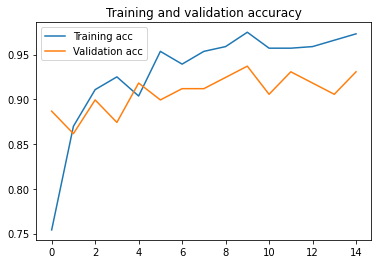

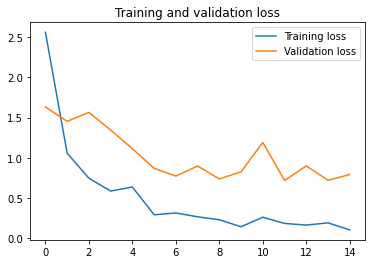

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()